In [30]:
import scanpy
import wget
import gzip
import shutil
import os
import numpy

In [12]:
# Unzip Files Function
def kat_unzip(zipfile, unzipfile):
    with gzip.open(zipfile, 'rb') as f_in:
        with open(unzipfile,'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Create Folder for Samples and Deposit Samples into Folder
foldername = ['naivebm', 'car1gfp']
for i in foldername:
    path = './'+i
    os.mkdir(path)
    if i == 'naivebm':
        barcodes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fbarcodes%2Etsv%2Egz')
        genes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fgenes%2Etsv%2Egz')
        matrix = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fmatrix%2Emtx%2Egz')
    elif i == 'car1gfp':
        barcodes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fbarcodes%2Etsv%2Egz')
        genes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fgenes%2Etsv%2Egz')
        matrix = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fmatrix%2Emtx%2Egz')
    filename = [barcodes, genes, matrix]
    unzipfilename = ['barcodes.tsv', 'genes.tsv','matrix.mtx' ]
    for j in range(len(filename)):
        kat_unzip(filename[j], path+'/'+unzipfilename[j])


In [14]:
data_naivebm = scanpy.read_10x_mtx('./naivebm', cache_compression=None)
data_naivebm.var_names_make_unique()
data_car1gfp = scanpy.read_10x_mtx('./car1gfp', cache_compression=None)
data_car1gfp.var_names_make_unique()

In [15]:
data_naivebm.obs['type']="naivebm"
data_naivebm.obs['sample']="naivebm_1"
data_car1gfp.obs['type']="car1gfp"
data_car1gfp.obs['sample']="car1gfp_1"

adata = data_naivebm.concatenate(data_car1gfp)

In [16]:
print (adata.obs['sample'].value_counts())

naivebm_1    6458
car1gfp_1    2522
Name: sample, dtype: int64


In [45]:
a = []
for i in adata.var_names:
    a.append(i)
a.sort()

In [47]:
for i in a:
    print(i)

0610007P14Rik
0610009B22Rik
0610009L18Rik
0610009O20Rik
0610010F05Rik
0610010K14Rik
0610011F06Rik
0610012G03Rik
0610030E20Rik
0610037L13Rik
0610038B21Rik
0610039K10Rik
0610040B10Rik
0610040J01Rik
0610043K17Rik
1010001B22Rik
1110001J03Rik
1110002L01Rik
1110004E09Rik
1110004F10Rik
1110006O24Rik
1110008F13Rik
1110008L16Rik
1110008P14Rik
1110012L19Rik
1110019D14Rik
1110020A21Rik
1110032A03Rik
1110032F04Rik
1110034G24Rik
1110035H17Rik
1110037F02Rik
1110038F14Rik
1110051M20Rik
1110059E24Rik
1110059G10Rik
1110065P20Rik
1190002N15Rik
1190005I06Rik
1190007I07Rik
1300002E11Rik
1300017J02Rik
1500002C15Rik
1500002F19Rik
1500009L16Rik
1500011B03Rik
1500011K16Rik
1500015A07Rik
1500026H17Rik
1600002H07Rik
1600002K03Rik
1600010M07Rik
1600012H06Rik
1600014C10Rik
1600020E01Rik
1700001L05Rik
1700001O22Rik
1700003F12Rik
1700007K13Rik
1700007L15Rik
1700008J07Rik
1700008O03Rik
1700010I14Rik
1700012B09Rik
1700012C14Rik
1700012L04Rik
1700015O11Rik
1700016F12Rik
1700016H13Rik
1700017B05Rik
1700018L02Rik
170001

Btf3l4
Btg1
Btg2
Btg3
Btk
Btla
Btn1a1
Btnl10
Btnl9
Btrc
Bub1
Bub1b
Bub3
Bud13
Bud31
Bysl
Bzrap1
Bzw1
Bzw2
C030010L15Rik
C030034I22Rik
C030034L19Rik
C030037D09Rik
C030039L03Rik
C130013H08Rik
C130026I21Rik
C130050O18Rik
C130060C02Rik
C1d
C1galt1
C1galt1c1
C1qa
C1qb
C1qbp
C1qc
C1qtnf4
C1qtnf6
C1ra
C1rl
C1s1
C2
C230035I16Rik
C230037L18Rik
C2cd2
C2cd2l
C2cd3
C2cd5
C3
C330006A16Rik
C330007P06Rik
C330011M18Rik
C330013E15Rik
C330013J21Rik
C330018D20Rik
C330021F23Rik
C330027C09Rik
C3ar1
C430042M11Rik
C4b
C530008M17Rik
C530050E15Rik
C5ar1
C5ar2
C730034F03Rik
C87436
C8g
C920006O11Rik
C920021L13Rik
CAAA01147332.1
Caap1
Cab39
Cab39l
Cabin1
Cables1
Cables2
Cabp4
Cabp7
Cabyr
Cacfd1
Cachd1
Cacna1a
Cacna1b
Cacna1c
Cacna1d
Cacna1e
Cacna1f
Cacna1g
Cacna1h
Cacna2d2
Cacna2d4
Cacnb1
Cacnb2
Cacnb4
Cacng4
Cactin
Cacul1
Cacybp
Cad
Cadm1
Cadm3
Cadps2
Cage1
Calcoco1
Calcrl
Cald1
Calhm2
Calm1
Calm2
Calm3
Calml4
Calr
Calr3
Calr4
Calu
Caly
Camk1
Camk1d
Camk2a
Camk2b
Camk2d
Camk2g
Camk2n2
Camk4
Camkk1
Camkk2
Camkmt


Elf4
Elk1
Elk3
Elk4
Ell
Ell2
Ell3
Elmo1
Elmo2
Elmo3
Elmod2
Elmod3
Elmsan1
Elof1
Elovl1
Elovl3
Elovl5
Elovl6
Elovl7
Elp2
Elp3
Elp4
Elp5
Elp6
Emb
Emc1
Emc10
Emc2
Emc3
Emc4
Emc6
Emc7
Emc8
Emc9
Emd
Eme1
Eme2
Emg1
Emid1
Emilin1
Emilin2
Eml1
Eml2
Eml3
Eml4
Eml5
Eml6
Emp1
Emp3
Emsy
Enah
Enc1
Endod1
Endog
Endou
Endov
Eng
Engase
Enkd1
Enkur
Eno1
Eno1b
Eno3
Enoph1
Enox2
Enpp1
Enpp3
Enpp4
Enpp5
Ensa
Enthd2
Entpd1
Entpd5
Entpd6
Entpd7
Eny2
Eogt
Eomes
Ep300
Ep400
Epb41
Epb41l1
Epb41l2
Epb41l3
Epb41l4aos
Epb41l4b
Epb41l5
Epb42
Epc1
Epc2
Epcam
Epdr1
Epg5
Epha10
Epha2
Epha4
Epha7
Ephb1
Ephb2
Ephb6
Ephx1
Ephx2
Epm2a
Epm2aip1
Epn1
Epn2
Epor
Eprs
Eps15
Eps15l1
Eps8
Eps8l1
Eps8l2
Epsti1
Ept1
Epx
Eqtn
Eral1
Erap1
Erbb2ip
Erbb3
Erc1
Ercc1
Ercc2
Ercc3
Ercc4
Ercc5
Ercc6
Ercc6l
Ercc6l2
Ercc8
Erdr1
Erf
Erg
Ergic1
Ergic2
Ergic3
Erh
Eri1
Eri2
Eri3
Erich1
Erich5
Erlec1
Erlin1
Erlin2
Ermap
Ermard
Ermp1
Ern1
Ero1l
Ero1lb
Erp27
Erp29
Erp44
Errfi1
Esam
Esco1
Esco2
Esd
Esf1
Esm1
Espl1
Espn
Esr1
Esrp2
Esrra
Esyt1
Esyt2


Gm9484
Gm9493
Gm9530
Gm960
Gm9725
Gm9726
Gm973
Gm9733
Gm9754
Gm9755
Gm9774
Gm9776
Gm9796
Gm9797
Gm9803
Gm9821
Gm9828
Gm9830
Gm9833
Gm9843
Gm9844
Gm9873
Gm9887
Gm9888
Gm9889
Gm9898
Gm9903
Gm9917
Gm9920
Gm9923
Gm9938
Gm9945
Gm9949
Gm9958
Gm996
Gm9970
Gmcl1
Gmds
Gmeb1
Gmeb2
Gmfb
Gmfg
Gmip
Gml
Gml2
Gmnn
Gmppa
Gmppb
Gmpr
Gmpr2
Gmps
Gna11
Gna12
Gna13
Gna14
Gna15
Gnai1
Gnai2
Gnai3
Gnal
Gnaq
Gnas
Gnat2
Gnaz
Gnb1
Gnb1l
Gnb2
Gnb2l1
Gnb4
Gne
Gng10
Gng11
Gng12
Gng13
Gng2
Gng3
Gng5
Gng7
Gngt2
Gnl1
Gnl2
Gnl3
Gnl3l
Gnmt
Gnpat
Gnpda1
Gnpda2
Gnpnat1
Gnptab
Gnptg
Gnrh1
Gns
Golga1
Golga2
Golga3
Golga4
Golga5
Golga7
Golgb1
Golim4
Golm1
Golph3
Golph3l
Golt1b
Gon4l
Gopc
Gorab
Gorasp1
Gorasp2
Gosr1
Gosr2
Got1
Got1l1
Got2
Gp1ba
Gp1bb
Gp5
Gp9
Gpaa1
Gpalpp1
Gpam
Gpank1
Gpat4
Gpatch1
Gpatch11
Gpatch2
Gpatch2l
Gpatch3
Gpatch4
Gpatch8
Gpbp1
Gpbp1l1
Gpc1
Gpc2
Gpc3
Gpc4
Gpc5
Gpcpd1
Gpd1
Gpd1l
Gpd2
Gpha2
Gphn
Gpi1
Gpkow
Gpld1
Gpm6b
Gpn1
Gpn2
Gpn3
Gpr107
Gpr108
Gpr132
Gpr137
Gpr137b
Gpr137b-ps
Gpr137c
Gpr141
Gpr146
Gp

Meis3
Melk
Memo1
Men1
Mepce
Mertk
Mesdc1
Mesdc2
Mesp2
Met
Metap1
Metap1d
Metap2
Metrn
Metrnl
Mettl1
Mettl10
Mettl13
Mettl14
Mettl15
Mettl16
Mettl17
Mettl18
Mettl2
Mettl20
Mettl21a
Mettl21b
Mettl21c
Mettl22
Mettl23
Mettl25
Mettl3
Mettl4
Mettl5
Mettl5os
Mettl6
Mettl7a1
Mettl7a2
Mettl7a3
Mettl8
Mettl9
Mex3a
Mex3b
Mex3c
Mex3d
Mfap1a
Mfap1b
Mfap2
Mfap3
Mfap3l
Mff
Mfge8
Mfhas1
Mfn1
Mfn2
Mfng
Mfsd1
Mfsd10
Mfsd11
Mfsd12
Mfsd2b
Mfsd3
Mfsd4
Mfsd5
Mfsd6
Mfsd6l
Mfsd7a
Mfsd7b
Mfsd8
Mfsd9
Mga
Mgam
Mgarp
Mgat1
Mgat2
Mgat4a
Mgat4b
Mgat4c
Mgat5
Mgea5
Mgl2
Mgll
Mgme1
Mgmt
Mgrn1
Mgst1
Mgst2
Mgst3
Mia3
Mib1
Mib2
Mical1
Mical2
Mical3
Micall1
Micall2
Micu1
Micu2
Micu3
Mid1
Mid1ip1
Midn
Mief1
Mief2
Mien1
Mier1
Mier2
Mier3
Mif
Mif4gd
Miip
Mill2
Milr1
Mina
Mink1
Minos1
Minpp1
Mios
Mip
Mipep
Mipol1
Mir142hg
Mir155hg
Mir17hg
Mirt1
Mis12
Mis18a
Mis18bp1
Mitd1
Mitf
Mki67
Mkks
Mkl1
Mkl2
Mkln1
Mkln1os
Mknk1
Mknk2
Mkrn1
Mkrn2
Mkrn3
Mks1
Mlec
Mlf1
Mlf2
Mlh1
Mlh3
Mlkl
Mllt1
Mllt10
Mllt11
Mllt3
Mllt4
Mllt6
Mlph
Mlst8
Ml

Ppp1r3b
Ppp1r3d
Ppp1r3e
Ppp1r3f
Ppp1r3fos
Ppp1r42
Ppp1r7
Ppp1r8
Ppp1r9a
Ppp1r9b
Ppp2ca
Ppp2cb
Ppp2r1a
Ppp2r1b
Ppp2r2a
Ppp2r2d
Ppp2r3a
Ppp2r3c
Ppp2r3d
Ppp2r4
Ppp2r5a
Ppp2r5b
Ppp2r5c
Ppp2r5d
Ppp2r5e
Ppp3ca
Ppp3cb
Ppp3cc
Ppp3r1
Ppp4c
Ppp4r1
Ppp4r2
Ppp5c
Ppp6c
Ppp6r1
Ppp6r2
Ppp6r3
Pprc1
Ppt1
Ppt2
Pptc7
Ppwd1
Pqbp1
Pqlc1
Pqlc2
Pqlc3
Pradc1
Praf2
Pram1
Pramef8
Pramel7
Prc1
Prcc
Prcp
Prdm1
Prdm10
Prdm11
Prdm15
Prdm16
Prdm2
Prdm4
Prdm5
Prdm9
Prdx1
Prdx2
Prdx3
Prdx4
Prdx5
Prdx6
Prdx6b
Preb
Prelid1
Prelid2
Prep
Prepl
Prex1
Prex2
Prf1
Prg2
Prg3
Prg4
Prickle1
Prickle3
Prim1
Prim2
Primpol
Prkaa1
Prkaa2
Prkab1
Prkab2
Prkaca
Prkacb
Prkag1
Prkag2
Prkar1a
Prkar1b
Prkar2a
Prkar2b
Prkca
Prkcb
Prkcd
Prkcdbp
Prkce
Prkcg
Prkch
Prkci
Prkcq
Prkcsh
Prkcz
Prkd2
Prkd3
Prkdc
Prkg1
Prkra
Prkrip1
Prkrir
Prkx
Prlh
Prlr
Prm1
Prmt1
Prmt10
Prmt2
Prmt3
Prmt5
Prmt6
Prmt7
Prnp
Prob1
Proca1
Prodh
Prok2
Prokr1
Prom1
Prorsd1
Pros1
Prosc
Proscos
Proser1
Proser2
Proser3
Prox2
Prox2os
Prpf18
Prpf19
Prpf3
Prpf31
Prpf38a
Prpf38b


Smyd3
Smyd4
Smyd5
Snai2
Snai3
Snap23
Snap29
Snap47
Snapc1
Snapc2
Snapc3
Snapc4
Snapc5
Snapin
Snca
Snd1
Snf8
Snhg12
Snhg20
Snhg6
Snhg9
Snip1
Snn
Snrk
Snrnp200
Snrnp25
Snrnp27
Snrnp35
Snrnp40
Snrnp48
Snrnp70
Snrpa
Snrpa1
Snrpb
Snrpb2
Snrpc
Snrpd1
Snrpd2
Snrpd3
Snrpe
Snrpf
Snrpg
Snta1
Sntb1
Sntb2
Snupn
Snw1
Snx1
Snx10
Snx11
Snx12
Snx13
Snx14
Snx15
Snx16
Snx17
Snx18
Snx19
Snx2
Snx20
Snx21
Snx22
Snx24
Snx25
Snx27
Snx29
Snx3
Snx30
Snx31
Snx32
Snx33
Snx4
Snx5
Snx6
Snx7
Snx8
Snx9
Soat1
Soat2
Sobp
Socs1
Socs2
Socs3
Socs4
Socs5
Socs6
Socs7
Sod1
Sod2
Soga1
Son
Sorbs1
Sorbs2
Sorbs3
Sorcs2
Sord
Sorl1
Sort1
Sos1
Sos2
Sowaha
Sowahc
Sox12
Sox13
Sox15
Sox4
Sox5
Sox6
Sox6os
Sp1
Sp100
Sp110
Sp140
Sp2
Sp3
Sp3os
Sp4
Sp6
Spa17
Spaca1
Spaca6
Spag1
Spag4
Spag5
Spag6l
Spag7
Spag8
Spag9
Sparc
Spast
Spata1
Spata13
Spata2
Spata24
Spata2l
Spata33
Spata5
Spata6
Spata7
Spata9
Spats2
Spc24
Spc25
Spcs1
Spcs2
Spcs3
Spdl1
Spdya
Specc1
Specc1l
Spef1
Spef2
Spen
Spg11
Spg20
Spg21
Spg7
Sphk1
Sphk2
Spi1
Spib
Spic
Spice1
Spid

Wsb1
Wsb2
Wtap
Wtip
Wwc1
Wwc2
Wwox
Wwp1
Wwp2
Xab2
Xaf1
Xbp1
Xcl1
Xcr1
Xdh
Xiap
Xist
Xk
Xkr5
Xkr8
Xkrx
Xlr
Xlr3a
Xlr3b
Xlr4a
Xlr4b
Xlr4c
Xndc1
Xntrpc
Xpa
Xpc
Xpnpep1
Xpnpep2
Xpnpep3
Xpo1
Xpo4
Xpo5
Xpo6
Xpo7
Xpot
Xpr1
Xrcc1
Xrcc2
Xrcc3
Xrcc4
Xrcc5
Xrcc6
Xrcc6bp1
Xrn1
Xrn2
Xxylt1
Xylb
Xylt1
Xylt2
Yae1d1
Yaf2
Yars
Yars2
Ybey
Ybx1
Ybx2
Ybx3
Ydjc
Yeats2
Yeats4
Yes1
Yif1a
Yif1b
Yipf1
Yipf2
Yipf3
Yipf4
Yipf5
Yipf6
Yjefn3
Ykt6
Ylpm1
Yme1l1
Yod1
Ypel1
Ypel2
Ypel3
Ypel4
Ypel5
Yrdc
Ythdc1
Ythdc2
Ythdf1
Ythdf2
Ythdf3
Ywhab
Ywhae
Ywhag
Ywhah
Ywhaq
Ywhaz
Yy1
Zadh2
Zak
Zan
Zap70
Zbed3
Zbed4
Zbed5
Zbp1
Zbtb1
Zbtb10
Zbtb11
Zbtb11os1
Zbtb12
Zbtb14
Zbtb16
Zbtb17
Zbtb18
Zbtb2
Zbtb20
Zbtb21
Zbtb22
Zbtb24
Zbtb25
Zbtb26
Zbtb3
Zbtb33
Zbtb34
Zbtb37
Zbtb38
Zbtb39
Zbtb4
Zbtb40
Zbtb41
Zbtb42
Zbtb43
Zbtb44
Zbtb45
Zbtb46
Zbtb48
Zbtb49
Zbtb5
Zbtb6
Zbtb7a
Zbtb7b
Zbtb8a
Zbtb8b
Zbtb8os
Zc2hc1a
Zc2hc1c
Zc3h10
Zc3h11a
Zc3h12a
Zc3h12b
Zc3h12c
Zc3h12d
Zc3h13
Zc3h14
Zc3h15
Zc3h18
Zc3h3
Zc3h4
Zc3h6
Zc3h7a
Zc3h7b
Zc3h8
Zc3hav1

In [18]:
scanpy.pp.filter_cells(adata, min_genes=200)
scanpy.pp.filter_genes(adata, min_cells=3)

In [19]:
adata.var['mt'] = adata.var_names.str.startswith('Mt') 
adata.var['ribo']= adata.var_names.str.startswith('Rpl','Rps')
adata.var['hb']= adata.var_names.str.startwith ('Hb')

adata.var

,gene_ids,n_cells,mt,ribo,hb
Mrpl15,ENSMUSG00000033845,2534,False,False,False
Lypla1,ENSMUSG00000025903,1506,False,False,False
Tcea1,ENSMUSG00000033813,2244,False,False,False
Atp6v1h,ENSMUSG00000033793,980,False,False,False
Rb1cc1,ENSMUSG00000025907,951,False,False,False
...,...,...,...,...,...
AC125149.2,ENSMUSG00000079794,14,False,False,False
AC168977.1,ENSMUSG00000079808,25,False,False,False
PISD,ENSMUSG00000095041,2127,False,False,False
DHRSX,ENSMUSG00000063897,1172,False,False,False


In [21]:
scanpy.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [31]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mt2'] = numpy.sum(
    adata[:, mito_genes].X, axis=1).A1 / numpy.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [32]:
adata

AnnData object with n_obs × n_vars = 8976 × 14568
    obs: 'type', 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors'

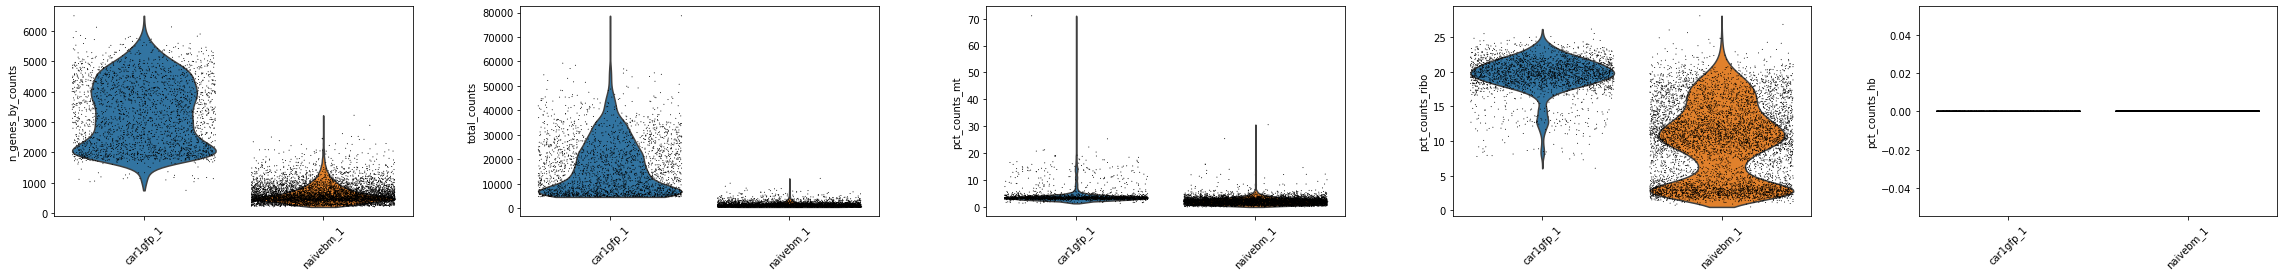

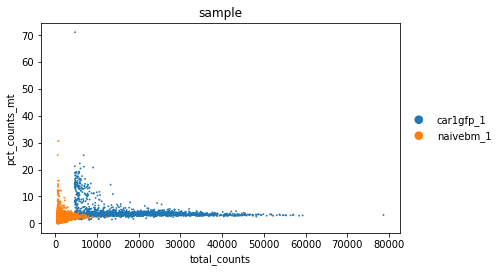

In [34]:
scanpy.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],jitter=0.4, groupby = 'sample', rotation= 45)
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="sample")

In [35]:
scanpy.pp.calculate_qc_metrics (adata)

(                      n_genes_by_counts  log1p_n_genes_by_counts  \
 AAACCTGAGATGTCGG-1-0                433                 6.073045   
 AAACCTGCACCTGGTG-1-0                482                 6.180017   
 AAACCTGCATCTCGCT-1-0                686                 6.532334   
 AAACCTGCATGAACCT-1-0                760                 6.634633   
 AAACCTGGTACATGTC-1-0                543                 6.298949   
 ...                                 ...                      ...   
 TTTGGTTCAATGGAAT-1-1               4213                 8.346168   
 TTTGGTTGTTATCGGT-1-1               3721                 8.222016   
 TTTGGTTTCTTGCCGT-1-1               5108                 8.538759   
 TTTGTCAGTATTACCG-1-1               4212                 8.345930   
 TTTGTCAGTCATATCG-1-1               2459                 7.807917   
 
                       total_counts  log1p_total_counts  \
 AAACCTGAGATGTCGG-1-0         739.0            6.606650   
 AAACCTGCACCTGGTG-1-0         753.0            6.625

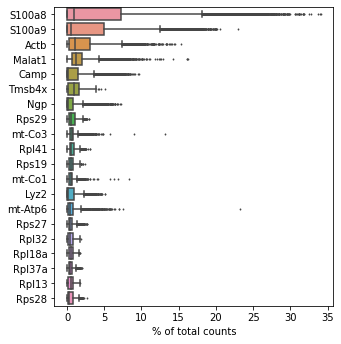

In [36]:
scanpy.pl.highest_expr_genes(adata, n_top=20)

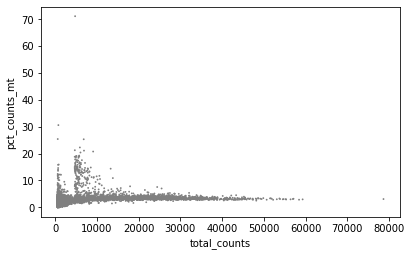

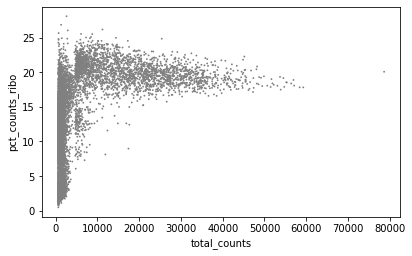

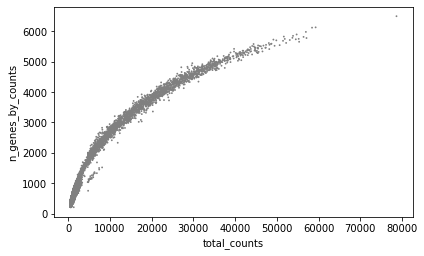

In [37]:
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
scanpy.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')